This Notebook is about the Perspective transormtion on a stop sign.

In [1]:
#load the libs
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

(620, 398, 3)


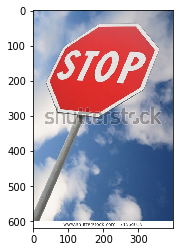

In [2]:
#read in the image
img = mpimg.imread("stop_sign.jpg")
print(img.shape)
plt.imshow(img)

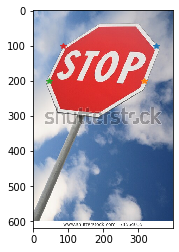

In [3]:
#source image ponints
plt.imshow(img)
plt.plot(350,100,'*')#top right
plt.plot(315,200,'*')#bottom right
plt.plot(44,200,'*')#bottom left
plt.plot(85,100,'*')#top left



In [4]:

#define perspective transormation function
def warp(img):
    #define calibration box in source and destination
    img_size = (img.shape[1], img.shape[0])
    #four co-ordinates
    src = np.float32([[350,100],
                     [315,200],
                     [44,200],
                     [85,100]])
    dst = np.float32([[350,100],
                     [350,200],
                     [85,200],
                     [85,100]])
    
    #compute the perspective image transformation mapping
    M = cv2.getPerspectiveTransform(src, dst)
    
    #could compute the inverse also by swapping the input parameters
    Minv = cv2.getPerspectiveTransform(dst,src)
    
    #create warped image - uses the linear interpolation
    warped = cv2.warpPerspective(img, M,img_size,flags = cv2.INTER_LINEAR )
    
    return warped
    

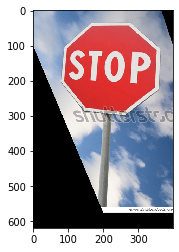

In [5]:
#get the perspective image
warped_im = warp(img)

#visual distortion
plt.imshow(warped_im)